In [14]:
import pandas as pd
import matplotlib as plt

In [3]:
# 분석할 데이터 로드

df = pd.read_csv("./resources/age_202008.csv", encoding="cp949")

df.head()

,행정구역,2020년08월_계_총인구수,2020년08월_계_연령구간인구수,2020년08월_계_0세,2020년08월_계_1세,2020년08월_계_2세,2020년08월_계_3세,2020년08월_계_4세,2020년08월_계_5세,2020년08월_계_6세,...,2020년08월_계_91세,2020년08월_계_92세,2020년08월_계_93세,2020년08월_계_94세,2020년08월_계_95세,2020년08월_계_96세,2020년08월_계_97세,2020년08월_계_98세,2020년08월_계_99세,2020년08월_계_100세 이상
0,서울특별시 (1100000000),"9,708,247","9,708,247","46,391","52,065","55,113","59,746","67,287","69,457","68,337",...,"8,354","6,505","4,904","3,437","2,578","2,004","2,087","1,419","1,027","6,632"
1,서울특별시 종로구 (1111000000),"149,962","149,962",520,585,603,703,847,793,891,...,205,136,133,91,75,54,61,58,34,270
2,서울특별시 종로구 청운효자동(1111051500),"12,550","12,550",52,63,65,86,83,99,89,...,17,6,7,10,6,6,5,4,2,19
3,서울특별시 종로구 사직동(1111053000),"9,484","9,484",31,36,44,53,66,71,75,...,27,9,10,12,5,3,9,1,2,20
4,서울특별시 종로구 삼청동(1111054000),"2,689","2,689",5,6,10,10,7,12,11,...,2,5,6,1,3,1,1,2,1,7


In [228]:
# 종로구 평창동 인구 수 시각화하기


# ① 종로구 평창동 지역 추출하기
pyeongchang_dong = df[df['행정구역'] == "서울특별시 종로구 평창동(1111056000)"]
pyeongchang_dong

,행정구역,2020년08월_계_총인구수,2020년08월_계_연령구간인구수,2020년08월_계_0세,2020년08월_계_1세,2020년08월_계_2세,2020년08월_계_3세,2020년08월_계_4세,2020년08월_계_5세,2020년08월_계_6세,...,2020년08월_계_91세,2020년08월_계_92세,2020년08월_계_93세,2020년08월_계_94세,2020년08월_계_95세,2020년08월_계_96세,2020년08월_계_97세,2020년08월_계_98세,2020년08월_계_99세,2020년08월_계_100세 이상
6,서울특별시 종로구 평창동(1111056000),"18,443","18,443",78,84,102,100,127,135,148,...,25,28,22,11,15,10,8,10,3,24


In [229]:
# 행정구역, 총인구수, 연령구간 인구수 컬럼 삭제

# 아래 방법을 써도 되나 warning 나옴 (바로 반영하는 것보다는 copy 해서 해!!!)
# pyeongchang_dong.drop(['2020년08월_계_총인구수','2020년08월_계_연령구간인구수'],axis=1, inplace=True)

pyeongchang_dong=pyeongchang_dong.drop(['행정구역','2020년08월_계_총인구수','2020년08월_계_연령구간인구수'],axis=1)
pyeongchang_dong

,2020년08월_계_0세,2020년08월_계_1세,2020년08월_계_2세,2020년08월_계_3세,2020년08월_계_4세,2020년08월_계_5세,2020년08월_계_6세,2020년08월_계_7세,2020년08월_계_8세,2020년08월_계_9세,...,2020년08월_계_91세,2020년08월_계_92세,2020년08월_계_93세,2020년08월_계_94세,2020년08월_계_95세,2020년08월_계_96세,2020년08월_계_97세,2020년08월_계_98세,2020년08월_계_99세,2020년08월_계_100세 이상
6,78,84,102,100,127,135,148,125,133,161,...,25,28,22,11,15,10,8,10,3,24


In [70]:
# 컬럼명 수정

pyeongchang_dong.columns = pyeongchang_dong.columns.str.replace("2020년08월_계_","")
pyeongchang_dong

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
6,78,84,102,100,127,135,148,125,133,161,...,25,28,22,11,15,10,8,10,3,24


In [72]:
# 데이터 타입 확인

pyeongchang_dong.dtypes 

0세         object
1세         object
2세         object
3세         object
4세         object
            ...  
96세        object
97세        object
98세        object
99세        object
100세 이상    object
Length: 101, dtype: object

In [73]:
# 특정 컬럼명 제거하고 변경하고 싶을 때(참고)
# pyeongchang_dong[pyeongchang_dong.columns.difference(["행정구역"])].astype("int")

pyeongchang_dong = pyeongchang_dong.astype("int64")
pyeongchang_dong.dtypes


0세         int64
1세         int64
2세         int64
3세         int64
4세         int64
           ...  
96세        int64
97세        int64
98세        int64
99세        int64
100세 이상    int64
Length: 101, dtype: object

In [74]:
# 행/열 변경

pyeongchang_dong = pyeongchang_dong.transpose()
pyeongchang_dong

,6
0세,78
1세,84
2세,102
3세,100
4세,127
...,...
96세,10
97세,8
98세,10
99세,3


In [76]:
# 열명 변경

pyeongchang_dong.columns = ["인구수"]
pyeongchang_dong

,인구수
0세,78
1세,84
2세,102
3세,100
4세,127
...,...
96세,10
97세,8
98세,10
99세,3


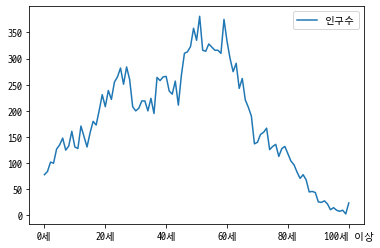

In [77]:
plt.rc("font", family="D2Coding")

pyeongchang_dong.plot()

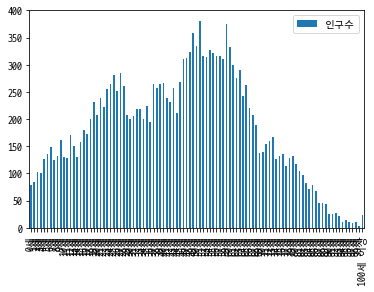

In [78]:
# 막대 그래프
pyeongchang_dong.plot(kind="bar")

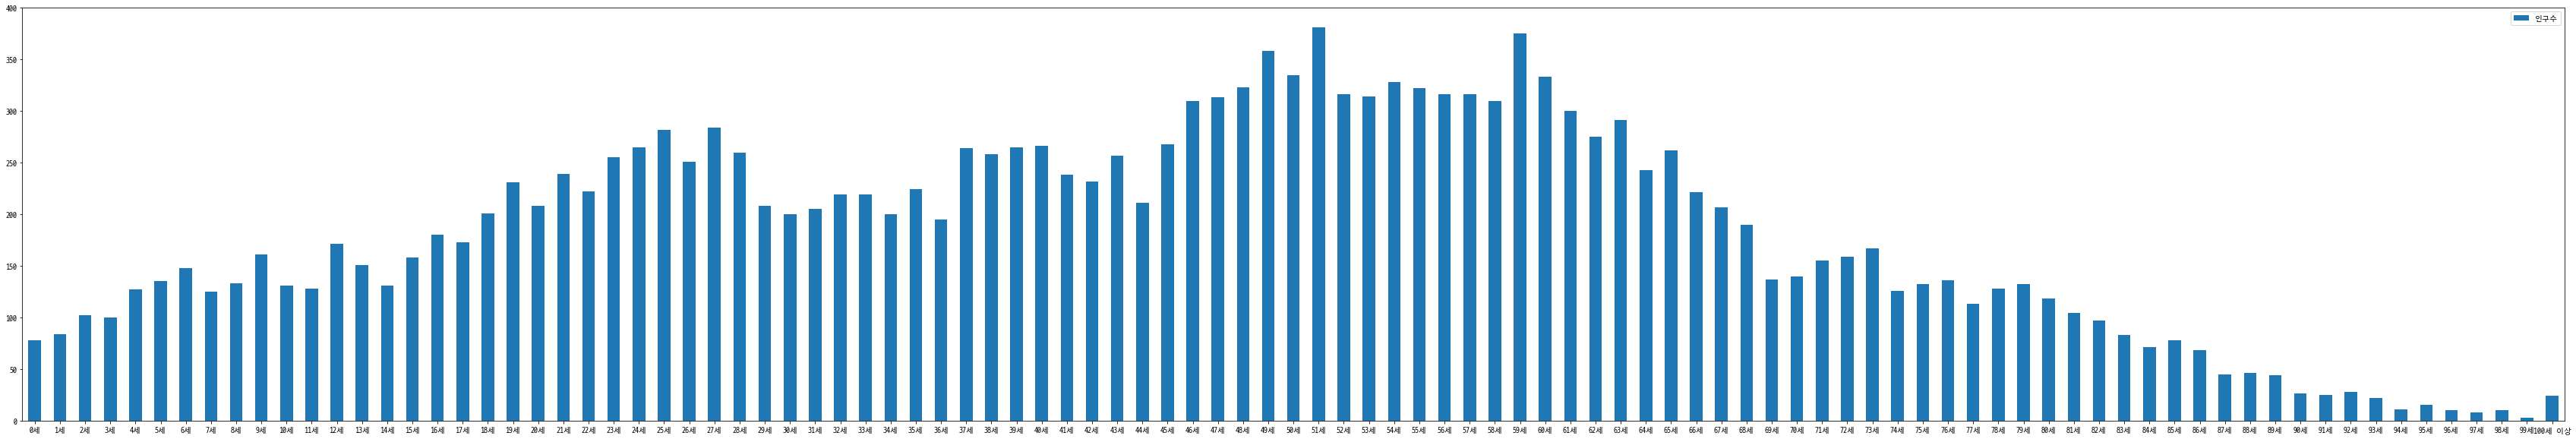

In [83]:
# 그래프 사이즈 변경, 글자 가로로 나오게

pyeongchang_dong.plot(kind="bar",figsize=(60,10), rot=0)

### 사용자로부터 분석할 동네를 입력받아 처리한다면?

In [28]:
# 분석할 데이터 로드

df = pd.read_csv("./resources/age_202008.csv", encoding="cp949",index_col=0)

df.head()

,2020년08월_계_총인구수,2020년08월_계_연령구간인구수,2020년08월_계_0세,2020년08월_계_1세,2020년08월_계_2세,2020년08월_계_3세,2020년08월_계_4세,2020년08월_계_5세,2020년08월_계_6세,2020년08월_계_7세,...,2020년08월_계_91세,2020년08월_계_92세,2020년08월_계_93세,2020년08월_계_94세,2020년08월_계_95세,2020년08월_계_96세,2020년08월_계_97세,2020년08월_계_98세,2020년08월_계_99세,2020년08월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),"9,708,247","9,708,247","46,391","52,065","55,113","59,746","67,287","69,457","68,337","71,285",...,"8,354","6,505","4,904","3,437","2,578","2,004","2,087","1,419","1,027","6,632"
서울특별시 종로구 (1111000000),"149,962","149,962",520,585,603,703,847,793,891,896,...,205,136,133,91,75,54,61,58,34,270
서울특별시 종로구 청운효자동(1111051500),"12,550","12,550",52,63,65,86,83,99,89,100,...,17,6,7,10,6,6,5,4,2,19
서울특별시 종로구 사직동(1111053000),"9,484","9,484",31,36,44,53,66,71,75,67,...,27,9,10,12,5,3,9,1,2,20
서울특별시 종로구 삼청동(1111054000),"2,689","2,689",5,6,10,10,7,12,11,12,...,2,5,6,1,3,1,1,2,1,7


In [29]:
# 필요없는 열 삭제
del df['2020년08월_계_총인구수'], df['2020년08월_계_연령구간인구수']

# 필요없는 행 삭제 할 때
# df2 = df.drop(['행정구역', '2020년08월_계_총인구수', '2020년08월_계_연령구간인구수'], axis=0)
df

,2020년08월_계_0세,2020년08월_계_1세,2020년08월_계_2세,2020년08월_계_3세,2020년08월_계_4세,2020년08월_계_5세,2020년08월_계_6세,2020년08월_계_7세,2020년08월_계_8세,2020년08월_계_9세,...,2020년08월_계_91세,2020년08월_계_92세,2020년08월_계_93세,2020년08월_계_94세,2020년08월_계_95세,2020년08월_계_96세,2020년08월_계_97세,2020년08월_계_98세,2020년08월_계_99세,2020년08월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),"46,391","52,065","55,113","59,746","67,287","69,457","68,337","71,285","74,507","75,408",...,"8,354","6,505","4,904","3,437","2,578","2,004","2,087","1,419","1,027","6,632"
서울특별시 종로구 (1111000000),520,585,603,703,847,793,891,896,920,990,...,205,136,133,91,75,54,61,58,34,270
서울특별시 종로구 청운효자동(1111051500),52,63,65,86,83,99,89,100,107,103,...,17,6,7,10,6,6,5,4,2,19
서울특별시 종로구 사직동(1111053000),31,36,44,53,66,71,75,67,72,62,...,27,9,10,12,5,3,9,1,2,20
서울특별시 종로구 삼청동(1111054000),5,6,10,10,7,12,11,12,11,16,...,2,5,6,1,3,1,1,2,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
제주특별자치도 서귀포시 서홍동(5013058000),70,84,87,102,122,135,134,149,145,150,...,7,8,0,5,0,1,2,2,1,2
제주특별자치도 서귀포시 대륜동(5013059000),135,131,151,163,170,174,163,144,164,167,...,5,8,6,6,4,2,10,3,2,7
제주특별자치도 서귀포시 대천동(5013060000),105,128,156,192,208,185,178,171,164,163,...,5,16,7,4,2,2,1,3,1,4


In [10]:
# 컬럼명 변경

df.columns = df.columns.str.replace("2020년08월_계_","")
df

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),"46,391","52,065","55,113","59,746","67,287","69,457","68,337","71,285","74,507","75,408",...,"8,354","6,505","4,904","3,437","2,578","2,004","2,087","1,419","1,027","6,632"
서울특별시 종로구 (1111000000),520,585,603,703,847,793,891,896,920,990,...,205,136,133,91,75,54,61,58,34,270
서울특별시 종로구 청운효자동(1111051500),52,63,65,86,83,99,89,100,107,103,...,17,6,7,10,6,6,5,4,2,19
서울특별시 종로구 사직동(1111053000),31,36,44,53,66,71,75,67,72,62,...,27,9,10,12,5,3,9,1,2,20
서울특별시 종로구 삼청동(1111054000),5,6,10,10,7,12,11,12,11,16,...,2,5,6,1,3,1,1,2,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
제주특별자치도 서귀포시 서홍동(5013058000),70,84,87,102,122,135,134,149,145,150,...,7,8,0,5,0,1,2,2,1,2
제주특별자치도 서귀포시 대륜동(5013059000),135,131,151,163,170,174,163,144,164,167,...,5,8,6,6,4,2,10,3,2,7
제주특별자치도 서귀포시 대천동(5013060000),105,128,156,192,208,185,178,171,164,163,...,5,16,7,4,2,2,1,3,1,4


In [30]:
dong = input("인구구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요 ")

location = df.index.str.contains(dong) 

df2 = df[location]
df2

인구구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요 미아동


,2020년08월_계_0세,2020년08월_계_1세,2020년08월_계_2세,2020년08월_계_3세,2020년08월_계_4세,2020년08월_계_5세,2020년08월_계_6세,2020년08월_계_7세,2020년08월_계_8세,2020년08월_계_9세,...,2020년08월_계_91세,2020년08월_계_92세,2020년08월_계_93세,2020년08월_계_94세,2020년08월_계_95세,2020년08월_계_96세,2020년08월_계_97세,2020년08월_계_98세,2020년08월_계_99세,2020년08월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 강북구 미아동(1130553500),45,61,63,78,96,87,77,111,92,128,...,21,19,13,9,5,8,3,0,2,10


In [31]:
type(df2)

pandas.core.frame.DataFrame

In [32]:
# 컬럼명 변경

df2.columns = df2.columns.str.replace("2020년08월_계_","")
df2

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 강북구 미아동(1130553500),45,61,63,78,96,87,77,111,92,128,...,21,19,13,9,5,8,3,0,2,10


In [33]:
# 행,열 변경

df2 = df2.transpose()
df2

행정구역,서울특별시 강북구 미아동(1130553500)
0세,45
1세,61
2세,63
3세,78
4세,96
...,...
96세,8
97세,3
98세,0
99세,2


In [34]:
# 컬럼명 변경

df2.columns = ["인구수"]
df2

,인구수
0세,45
1세,61
2세,63
3세,78
4세,96
...,...
96세,8
97세,3
98세,0
99세,2


In [35]:
df2['인구수'] = df2['인구수'].astype("int64")
df2

,인구수
0세,45
1세,61
2세,63
3세,78
4세,96
...,...
96세,8
97세,3
98세,0
99세,2


<AxesSubplot:title={'center':'2020년 미아동 나이별 인구수'}>

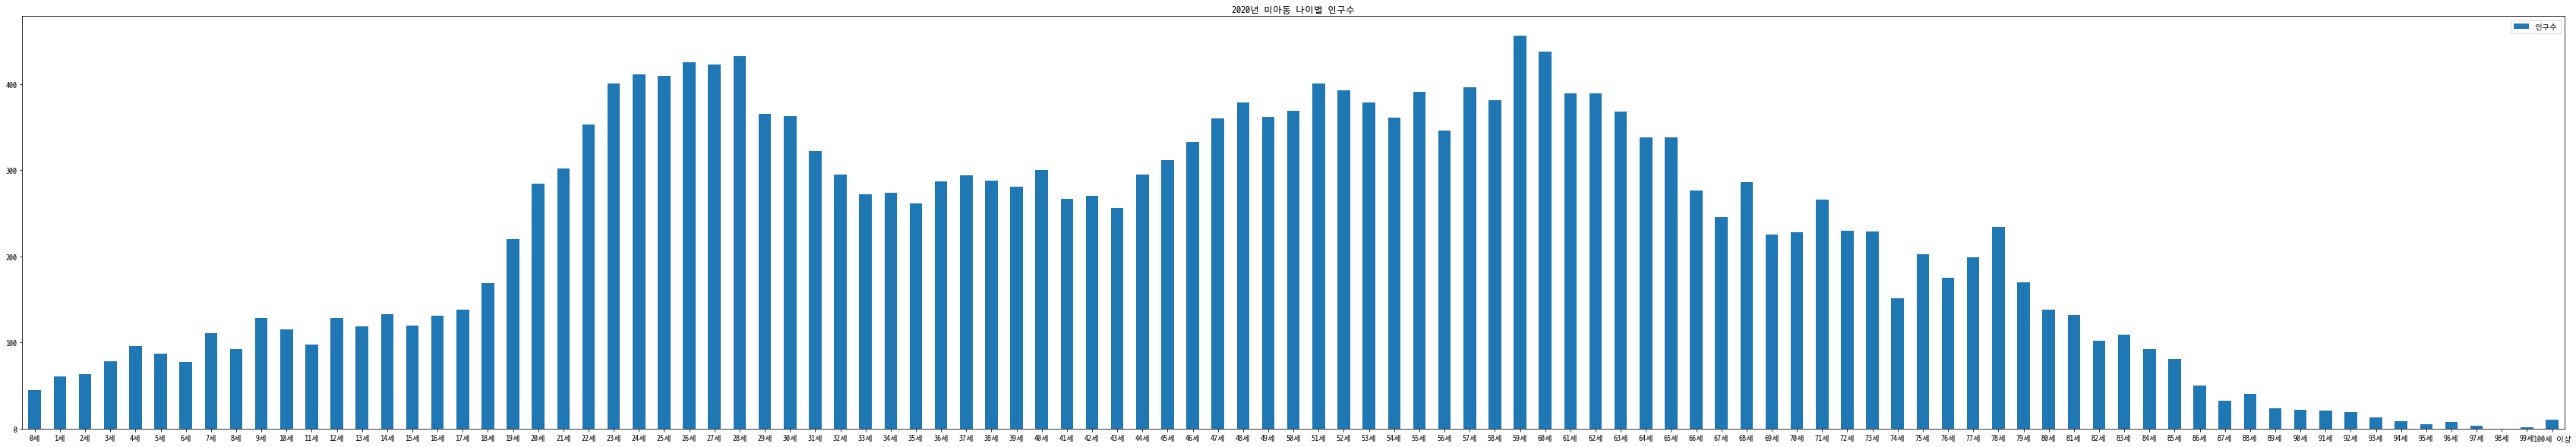

In [38]:
plt.rc("font", family="D2Coding")
df2.plot(kind="bar", title="2020년 " + dong + " 나이별 인구수", figsize=(60, 10), rot=0)

<AxesSubplot:>

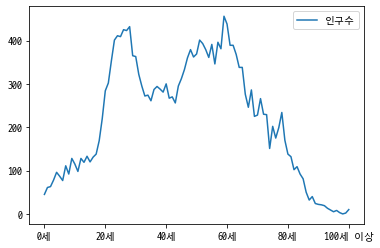

In [39]:
df2.plot()